In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [41]:
df=pd.read_csv("D:\Machine Learning and AI projects\Heart Attack  Analysis\heart_failure_clinical_records_dataset.csv")

In [42]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [43]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [44]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: >

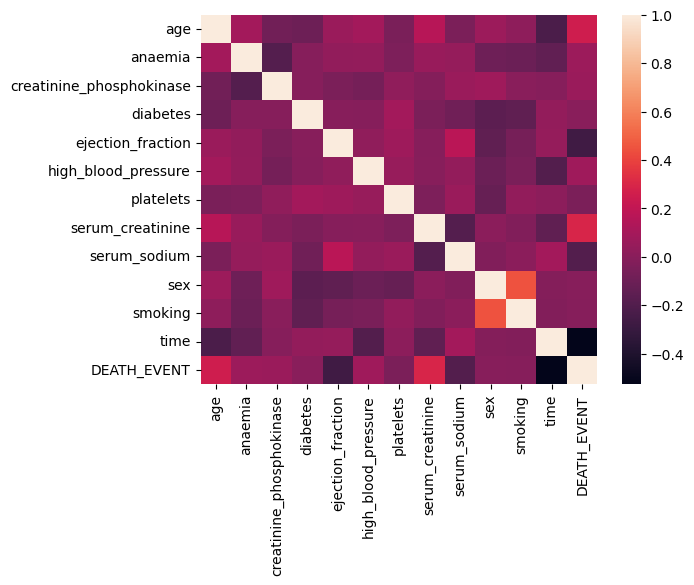

In [46]:
sns.heatmap(df.corr())

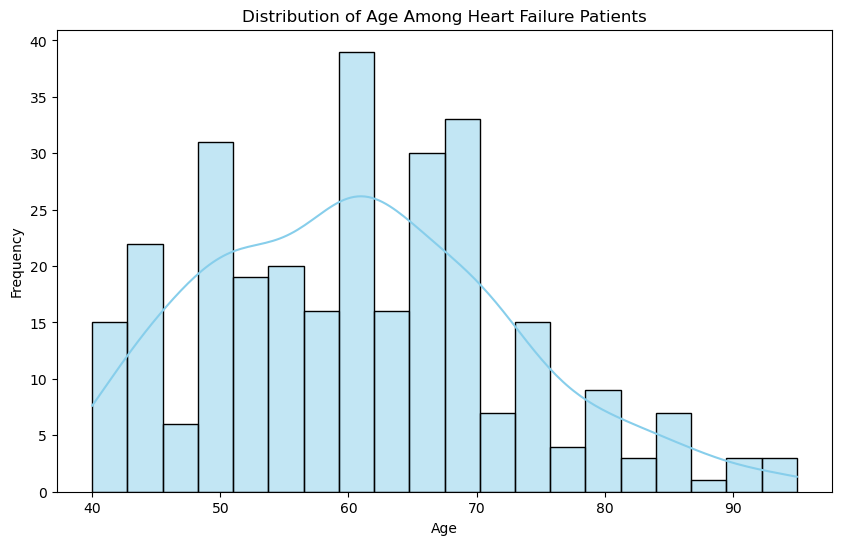

In [47]:
'''Age Distribution of Heart Failure Patients
'''

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


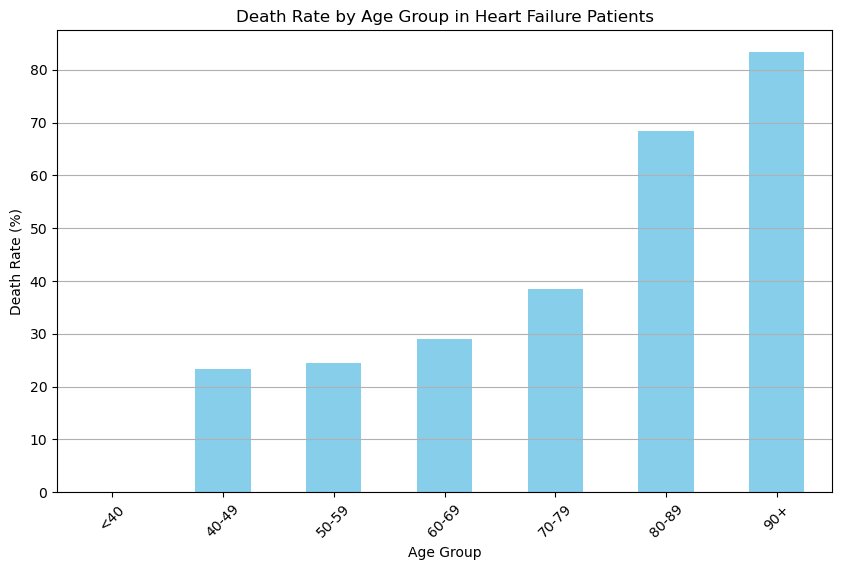

In [48]:
'''death rate vary with age
'''


bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['<40', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

death_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100  

plt.figure(figsize=(10, 6))
death_rate.plot(kind='bar', color='skyblue')
plt.title('Death Rate by Age Group in Heart Failure Patients')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [49]:
'''percentage of male and female
'''


gender_counts = df.groupby('sex')['sex'].count()


total_count = gender_counts.sum()
gender_percentage = (gender_counts / total_count) * 100


print("Percentage of Male Patients: {:.2f}%".format(gender_percentage[1]))  
print("Percentage of Female Patients: {:.2f}%".format(gender_percentage[0])) 


Percentage of Male Patients: 64.88%
Percentage of Female Patients: 35.12%


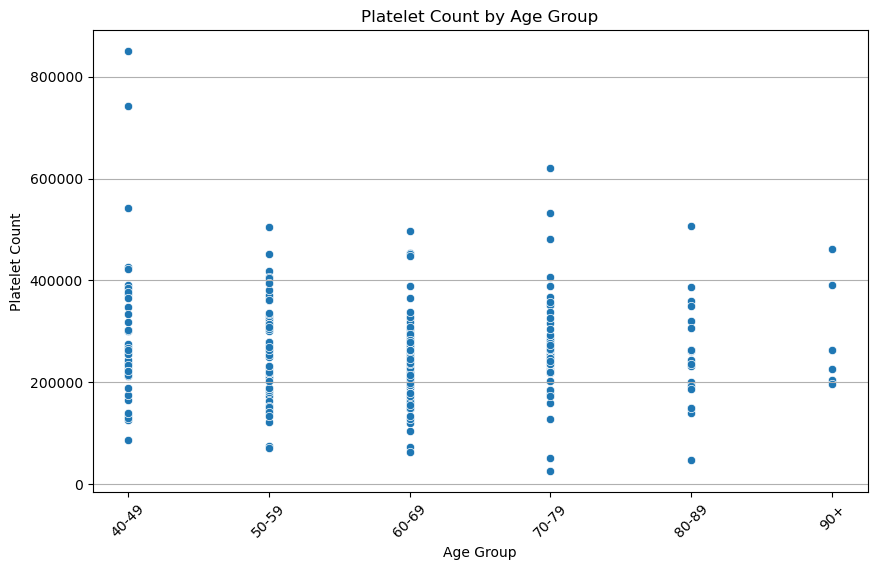

In [50]:
'''Platelet Count by Age Group
'''


bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['<40', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_group', y='platelets', data=df)
plt.title('Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [51]:
''' correlation between creatinine and sodium levels in the blood
'''

correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print("Correlation between serum creatinine and serum sodium:", correlation)
#negative co-relation 

Correlation between serum creatinine and serum sodium: -0.18909521009117386


In [52]:
'''prevalence of high blood pressure differ between male and female patients
'''


df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})


high_bp_counts = df.groupby('sex')['high_blood_pressure'].value_counts().unstack()


high_bp_percentage = (high_bp_counts.div(high_bp_counts.sum(axis=1), axis=0) * 100).fillna(0)

print("Prevalence of High Blood Pressure by Gender:")
print(high_bp_percentage)

Prevalence of High Blood Pressure by Gender:
high_blood_pressure          0          1
sex                                      
Female               58.095238  41.904762
Male                 68.556701  31.443299


In [53]:
'''relation in smoking and occurence of heart failure
'''


smoking_percentage = df.groupby('DEATH_EVENT')['smoking'].mean() * 100
print("Percentage of Smokers by Heart Failure Event:")
print(smoking_percentage)


Percentage of Smokers by Heart Failure Event:
DEATH_EVENT
0    32.512315
1    31.250000
Name: smoking, dtype: float64


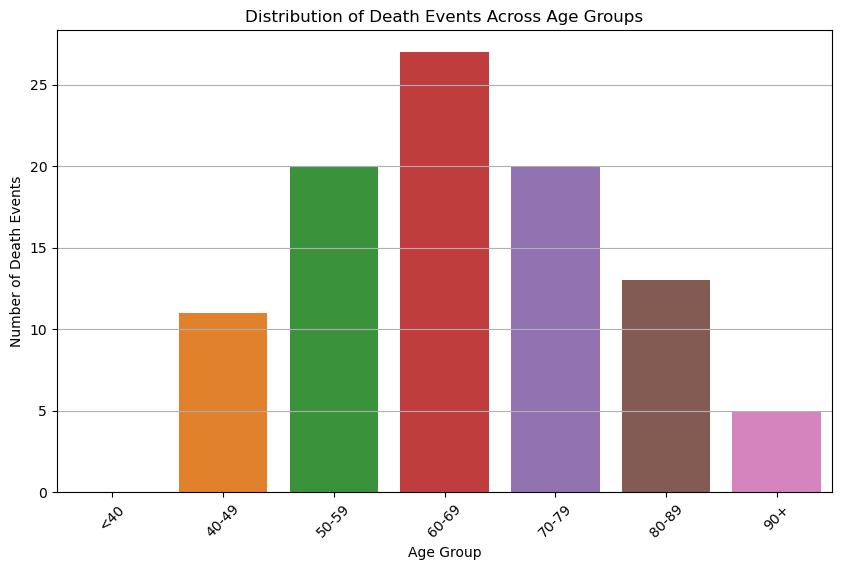

In [54]:
'''noticeable patterns in the distribution of death events across different age groups
'''


death_events = df.groupby('age_group')['DEATH_EVENT'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=death_events.index, y=death_events.values)
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#As ages increase chance of heart attack increase 

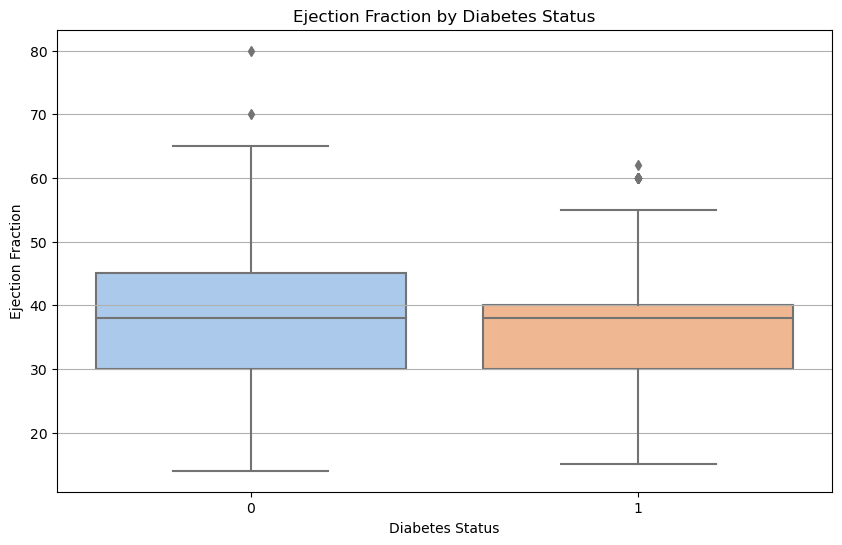

T-statistic: nan
P-value: nan


In [55]:
'''is there any significant difference in ejection fraction between patients with and without diabetes
'''


plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette='pastel')
plt.title('Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.grid(axis='y')


plt.show()


diabetes_yes = df[df['diabetes'] == 'Yes']['ejection_fraction']
diabetes_no = df[df['diabetes'] == 'No']['ejection_fraction']
t_stat, p_value = stats.ttest_ind(diabetes_yes, diabetes_no)
print("T-statistic:", t_stat)
print("P-value:", p_value)



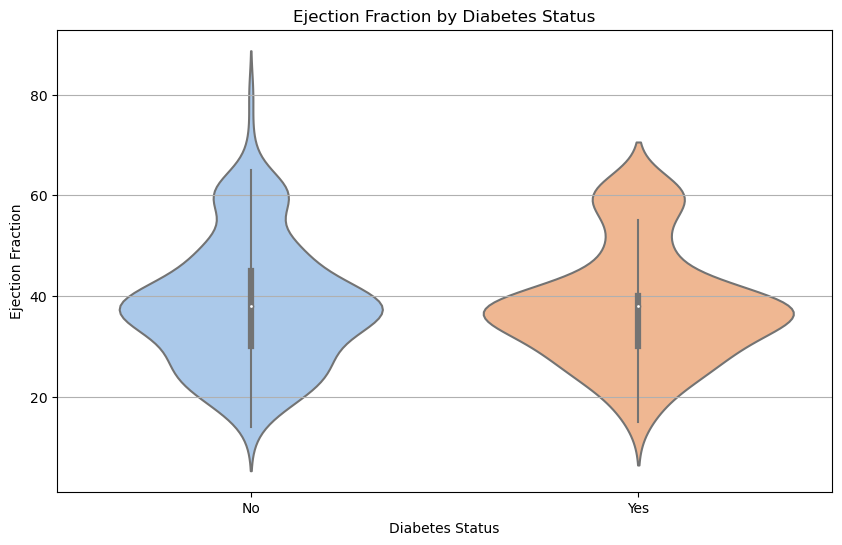

In [56]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='ejection_fraction', data=df, palette='pastel')
plt.title('Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y')

# Show the plot
plt.show()

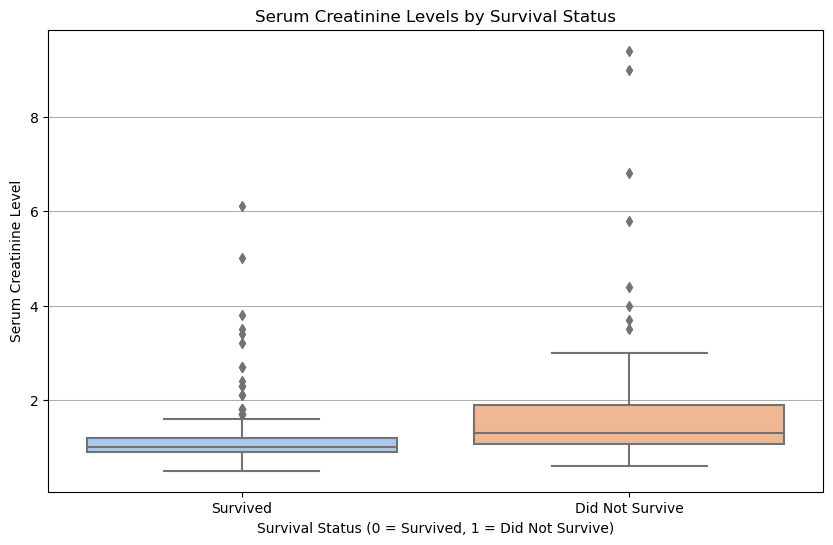

T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07


In [57]:
'''Does the serum creatine level vary between patients who survived and those who did not?
'''


plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='pastel')
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0 = Survived, 1 = Did Not Survive)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Did Not Survive'])
plt.grid(axis='y')


plt.show()


survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

t_stat, p_value = stats.ttest_ind(survived, not_survived)


print("T-statistic:", t_stat)
print("P-value:", p_value)




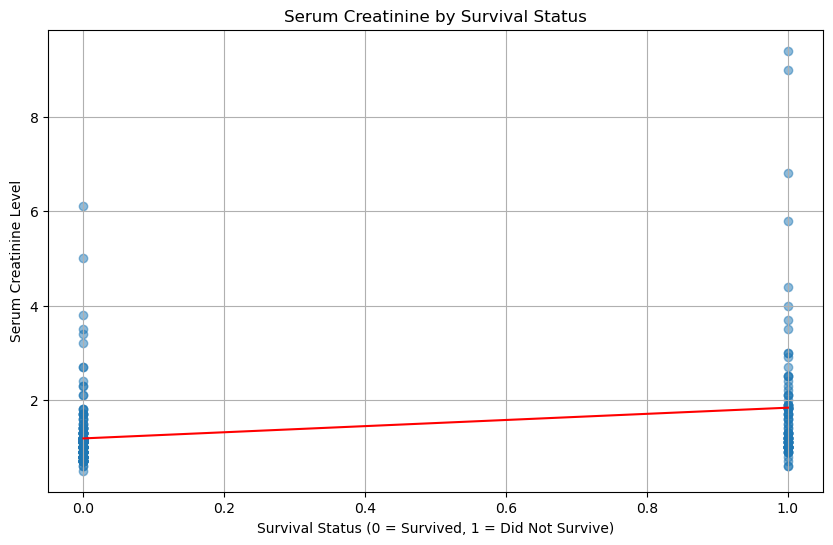

In [58]:


plt.figure(figsize=(10, 6))
plt.scatter(df['DEATH_EVENT'], df['serum_creatinine'], alpha=0.5)
z = np.polyfit(df['DEATH_EVENT'], df['serum_creatinine'], 1)
p = np.poly1d(z)
plt.plot(df['DEATH_EVENT'], p(df['DEATH_EVENT']), color='red')
plt.title('Serum Creatinine by Survival Status')
plt.xlabel('Survival Status (0 = Survived, 1 = Did Not Survive)')
plt.ylabel('Serum Creatinine Level')
plt.grid()


plt.show()